<a href="https://colab.research.google.com/github/pachterlab/GFCP_2021/blob/main/notebooks/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies


In [5]:
%%capture
pip install --upgrade git+https://github.com/meichenfang/velocyto.py.git

In [ ]:
%%capture
pip install scanpy

In [ ]:
%%capture
pip install umap-learn

In [ ]:
#from urllib.request import urlretrieve
#!mkdir ../figure data
#urlretrieve("http://pklab.med.harvard.edu/velocyto/hgForebrainGlut/hgForebrainGlut.loom", "data/hgForebrainGlut.loom")

('hgForebrainGlut.loom', <http.client.HTTPMessage at 0x7f3052b53b50>)

In [1]:
## run in colab ##
#!git clone https://github.com/pachterlab/GFCP_2021.git
#!cd GFCP_2021
#from vis import * 

## run locally ##
%cd ../../GFCP_2021
from vis import * 
%cd notebooks

/Users/fang/OneDrive - California Institute of Technology/Caltech/Research/Pachter/RNA velocity/What_is_RNA_velocity/GFCP_2021


In /Users/fang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/fang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/fang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/fang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/fang/opt/anaconda3/lib/python3.7/site-

/Users/fang/OneDrive - California Institute of Technology/Caltech/Research/Pachter/RNA velocity/What_is_RNA_velocity/GFCP_2021/notebooks


# Forebrain data

In [3]:
import time

In [23]:
vlm = vcy.VelocytoLoom(loom_filepath="data/hgForebrainGlut.loom")
preprocess(vlm)

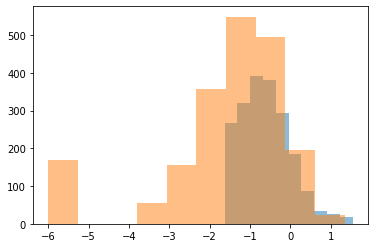

In [23]:
plt.hist(np.log10(1e-6+np.mean(vlm.S,axis=1)),alpha=0.5)
plt.hist(np.log10(1e-6+np.mean(vlm.U,axis=1)),alpha=0.5)
plt.show()

average expression of spliced is just over 1. Average expression of unspliced is under 1.

In [24]:
np.mean(vlm.S)

0.8756290465817058

In [25]:
np.mean(vlm.U)

0.33778611803158853

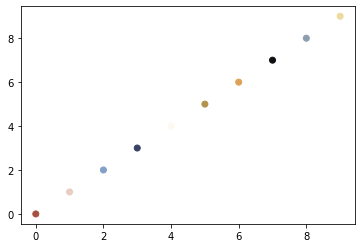

In [26]:
plt.scatter(np.arange(10),np.arange(10),c=vermeer)

## phasePlots (Fig 6)

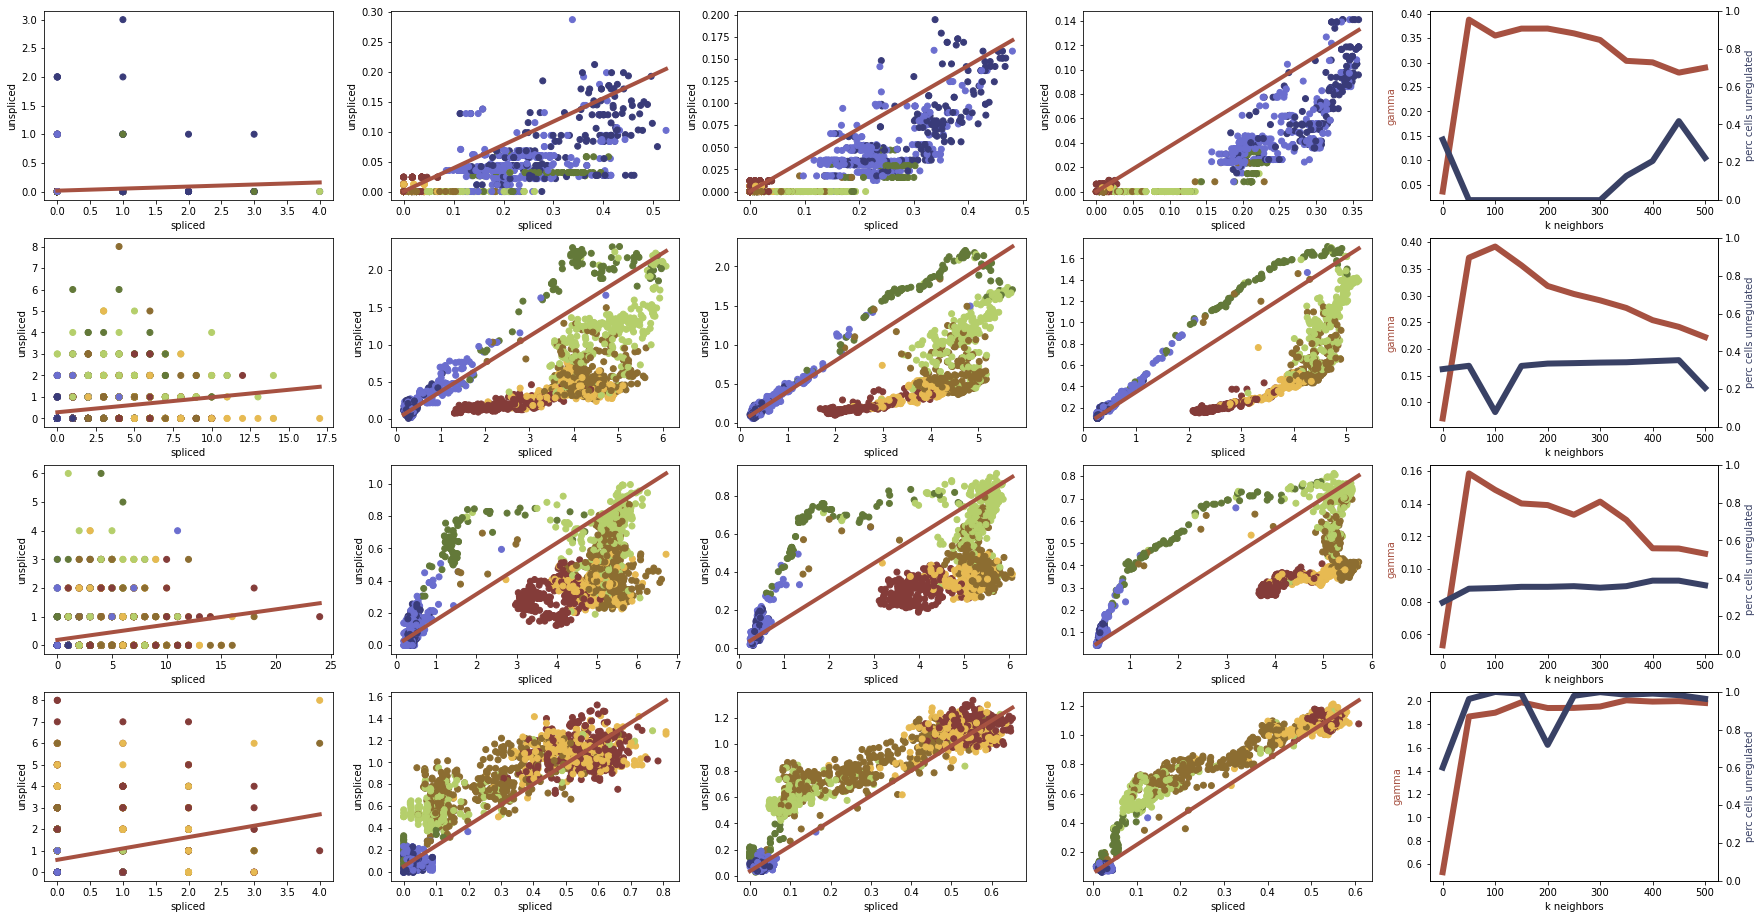

In [5]:
t1 = time.time()
fig=phasePlots(vlm,genes=["FAM64A","ELAVL4","DCX","GRIA3"],n_neighs=[0,50,100,200],n_neighs_list=np.arange(0,550,50),sim=False,zero_is_special=True)
dtime = time.time()-t1

In [30]:
print('Runtime: {:.1f} seconds.'.format(dtime))

Runtime: 53.1 seconds.


In [6]:
fig.savefig('../figure/figure_6.png',dpi=450)

## jaccardPlots (Fig 7)

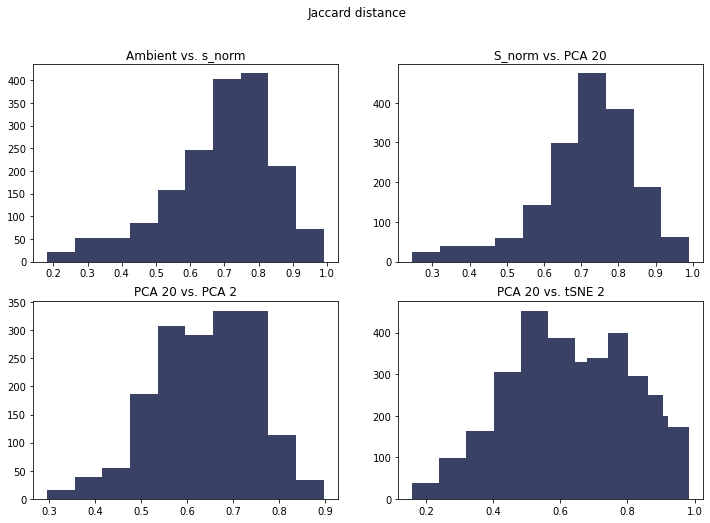

In [8]:
fig = plt.figure(figsize=(24,8))
ax0 = plt.subplot2grid((2, 4), (0, 0))
ax1 = plt.subplot2grid((2, 4), (0, 1))
ax2 = plt.subplot2grid((2, 4), (1, 0))
ax3 = plt.subplot2grid((2, 4), (1, 1))
ax4 = plt.subplot2grid((2, 4), (0, 2), rowspan=2, colspan=2)

fig, ax=plt.subplots(2,2,)
fracs=[]
labels=["Ambient vs. s_norm","S_norm vs. PCA 20","PCA 20 vs. PCA 2","PCA 20 vs. tSNE 2", "Ambient vs PCA 2", "Ambient vs tSNE 2"]
makeEmbeds(vlm, embeds="PCA", x_name="S")
ax0.set_title(labels[0])
fracs.append(plotJaccard(ax0, vlm.S.T, vlm.S_norm.T, n_neigh=150))

ax1.set_title(labels[1])
fracs.append(plotJaccard(ax1,vlm.PCA[:,:20], vlm.S_norm.T,n_neigh=150))

ax2.set_title(labels[2])
fracs.append(plotJaccard(ax2,vlm.PCA[:,:20],vlm.PCA[:,:2],n_neigh=150))

ax3.set_title(labels[3])
makeEmbeds(vlm, embeds="tSNE", x_name="S_norm")
fracs.append(plotJaccard(ax3,vlm.PCA[:,:20], vlm.ts, n_neigh=150))


fracs.append(plotJaccard(ax[1,1],vlm.S.T, vlm.PCA[:,:2], n_neigh=150))
fracs.append(plotJaccard(ax[1,1],vlm.S.T, vlm.ts, n_neigh=150))

import seaborn as sn
import pandas as pd

fracs_pd=pd.DataFrame(data=np.transpose(fracs),columns=labels)
fig, ax=plt.subplots(1,1,figsize=(12,8))

ax.set_title("eCDF")
ax.set_xlabel("Jaccard distance")
sn.ecdfplot(fracs_pd,ax=ax)
fig.suptitle("Jaccard distance")
fig.savefig('../figure/figure_7.png',dpi=450)



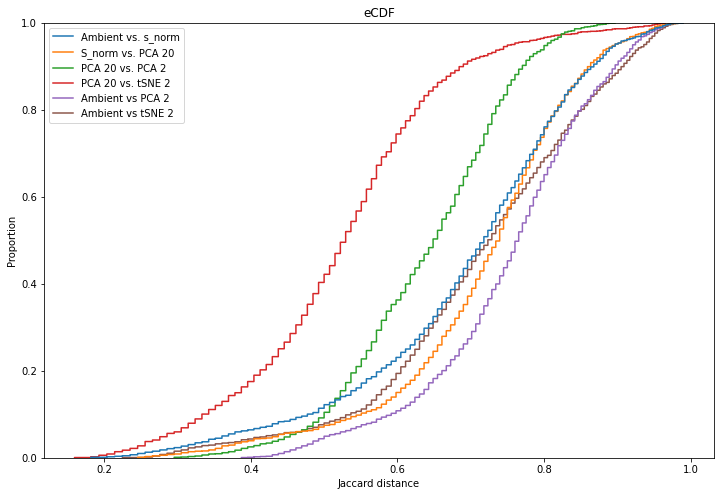

## angleDevPlots (Fig 8)

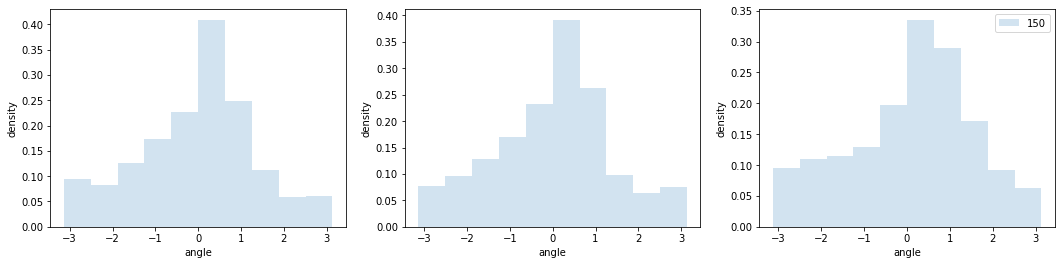

In [11]:
fig=angleDevPlots(vlm,Trans=["sqrt","log","linear"],n_neighs=[150])
fig.savefig('../figure/figure_8.png',dpi=450)

## gridArrowPlots (Fig 9)

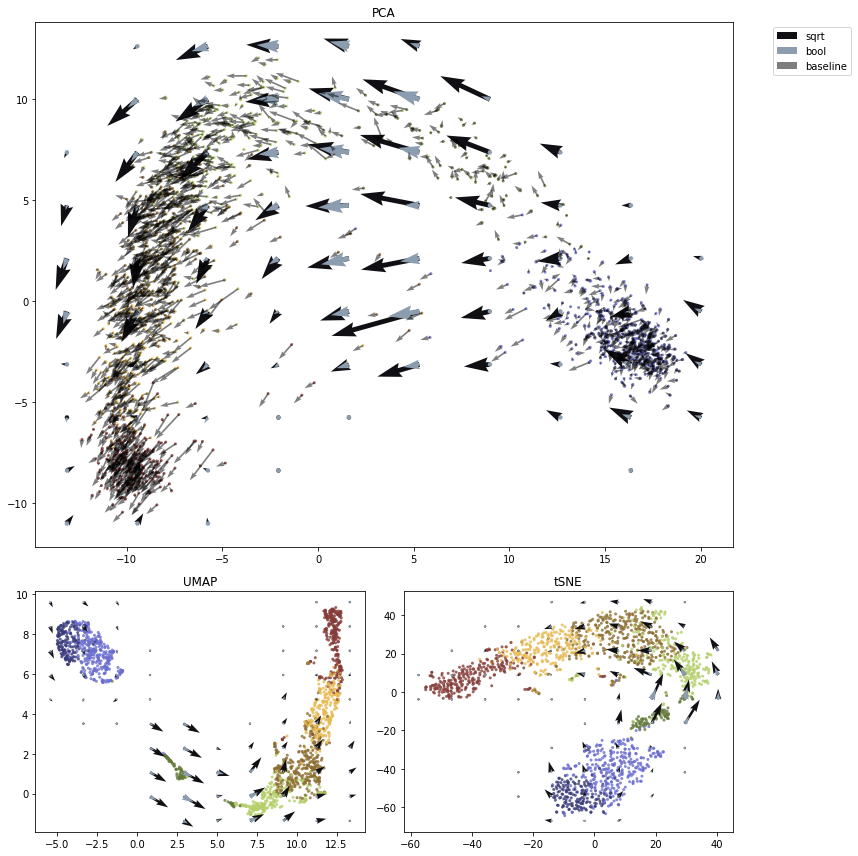

In [31]:
fig = plt.figure(figsize=(12,12))
ax=[]
ax.append(plt.subplot2grid((3, 2), (0, 0), rowspan=2, colspan=2))
ax.append(plt.subplot2grid((3, 2), (2, 0)))
ax.append(plt.subplot2grid((3, 2), (2, 1)))
gridArrowPlots(vlm,Trans=["sqrt","bool"],embed="PCA",sim=False,ax=ax[0],quiver_scale=10,legend=True)
gridArrowPlots(vlm,Trans=["sqrt","bool"],embed="UMAP",sim=False,ax=ax[1],quiver_scale=10,legend=False)
gridArrowPlots(vlm,Trans=["sqrt","bool"],embed="tSNE",sim=False,ax=ax[2],quiver_scale=10,legend=False)
fig.tight_layout()

In [32]:
fig.savefig('../figure/figure_9.pdf')
fig.savefig('../figure/figure_9.png',dpi=450)

# Simulation

Generate simulation data

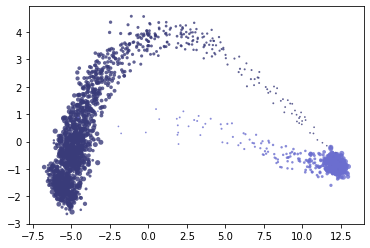

In [2]:
nCells,nGenes,T,tau,topo =  2000,100,20,[0,8,13],"aba"
name="data/simdata_aba"
meta = nCells,nGenes,T,tau,topo
#simdata = simulate_occup_meas(nCells,nGenes,T,tau,topo,seed=42)
#sim_export(simdata,meta,name)
vlm = vcy.VelocytoLoom(loom_filepath=name+".loom")
preprocess(vlm,sim=True,meta=meta,filter=False)
fig,ax=plt.subplots(1,1,figsize=(6,4))
plotEmbed(ax,vlm,"pcs")

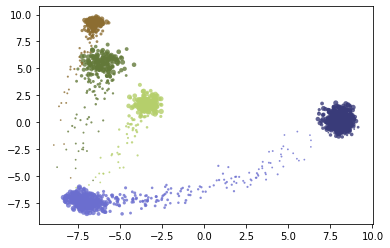

In [46]:
nCells,nGenes,T,tau,topo =  2000,100,20,[0,8,13],"ab(c/d/e)"
name="data/simdata_abcde"
meta = nCells,nGenes,T,tau,topo
#simdata = simulate_occup_meas(nCells,nGenes,T,tau,topo,seed=2021)
#sim_export(simdata,meta,name)
vlm = vcy.VelocytoLoom(loom_filepath=name+".loom")
preprocess(vlm,sim=True,meta=meta,filter=False)
fig,ax=plt.subplots(1,1,figsize=(6,4))
plotEmbed(ax,vlm,"pcs")

## gridArrowPlots (Fig 12)

In [ ]:
fig = plt.figure(figsize=(12,12))
ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan=2, colspan=2)
ax2 = plt.subplot2grid((3, 2), (2, 0))
ax3 = plt.subplot2grid((3, 2), (2, 1))
gridArrowPlots(vlm,Trans=["sqrt","bool"],embed="PCA",meta=meta,sim=True,ax=ax1,quiver_scale=20,legend=True)
gridArrowPlots(vlm,Trans=["sqrt","bool"],embed="UMAP",meta=meta,sim=True,ax=ax2,quiver_scale=5,legend=False)
gridArrowPlots(vlm,Trans=["sqrt","bool"],embed="tSNE",meta=meta,sim=True,ax=ax3,quiver_scale=5,legend=False)
fig.tight_layout()

In [64]:
fig.savefig('../figure/figure_12.png',dpi=450)

## Fig 11

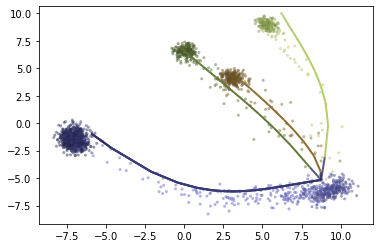

In [124]:
fig, ax=plt.subplots(1,1)
plotEmbed(ax,vlm,"pcs")
colorbytime=True
princCurvePlots(ax,vlm,meta,colorbytime)

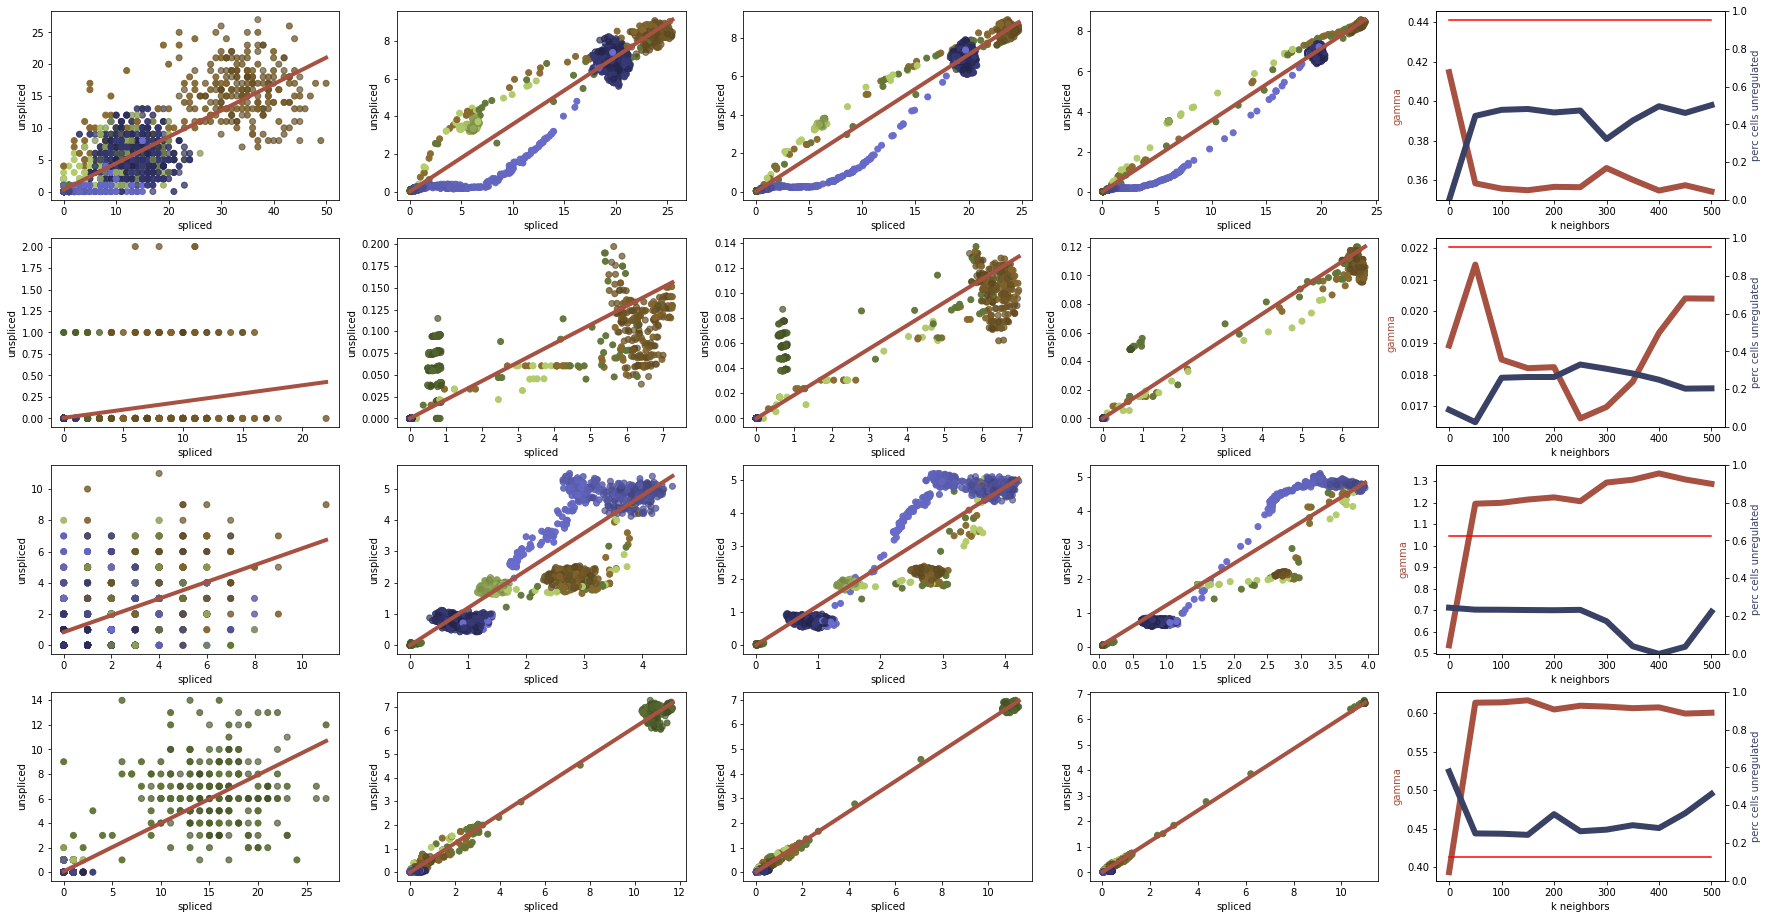

In [57]:
# fig=phasePlots(vlm,n_neighs=[0,10,50,100],genes=3,sim=True)
fig=phasePlots(vlm,genes=4,n_neighs=[0,50,100,200],n_neighs_list=np.arange(0,550,50),sim=True,zero_is_special=True)

In [262]:
vlm.S.shape

(100, 2000)

Text(0.5, 0, 'log average expression (+1e-6)')

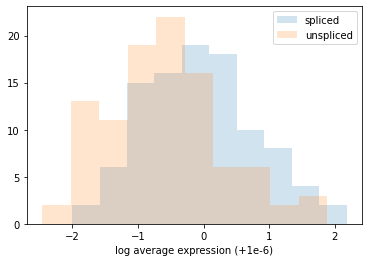

In [263]:
plt.hist(np.log10(vlm.S.mean(axis=1)+1e-6),label='spliced',alpha=0.2)
plt.hist(np.log10(vlm.U.mean(axis=1)+1e-6),label='unspliced',alpha=0.2)
plt.legend()
plt.xlabel('log average expression (+1e-6)')

In [264]:
vlm.S.mean()

6.09437

In [265]:
vlm.U.mean()

3.002005

## Fig 10

In [11]:
nCells,nGenes,T,tau,topo =  2000,100,20,[0,8,13],"aba"
name="data/simdata_aba"
meta = nCells,nGenes,T,tau,topo
vlm = vcy.VelocytoLoom(loom_filepath=name+".loom")
preprocess(vlm,sim=True,meta=meta,filter=False)

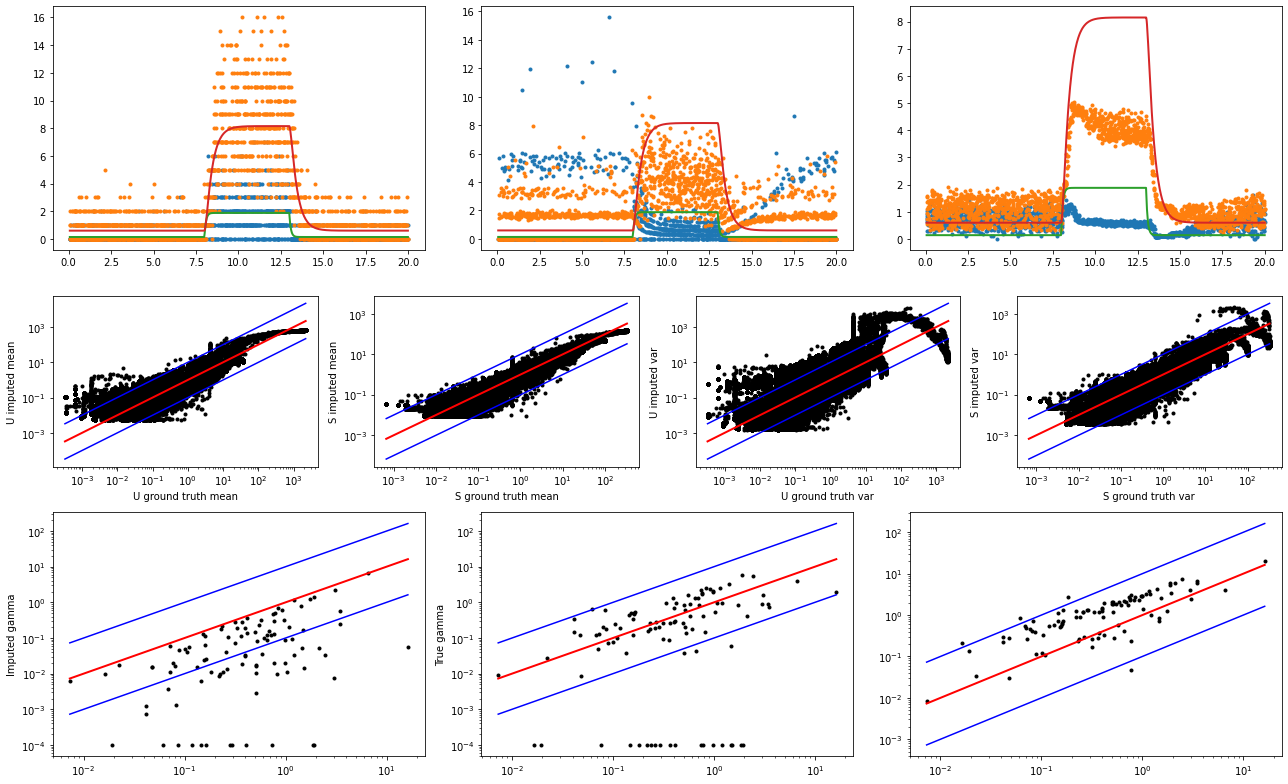

In [21]:
fig=simValidPlots(vlm,tau,geneind=3)
fig.tight_layout()

In [22]:
fig.savefig('../figure/figure_11_cde.png',dpi=450)

Let's do just like a whole lot of simulations

So, here is the issue. 2k cells @ 100 genes takes about half a minute to simulate. Velocity performance is very inconsistent: sometimes it's basically ok and concordant, sometimes it catastrophically fails and completely flips the arrows wrt the true dynamics. 

We want to be able to illustrate both cases (potentially for a supp. fig). But more than that -- we *have to* have reproducibility using a simple seed.

ab(c/d)
Runtime: 16.6 seconds.


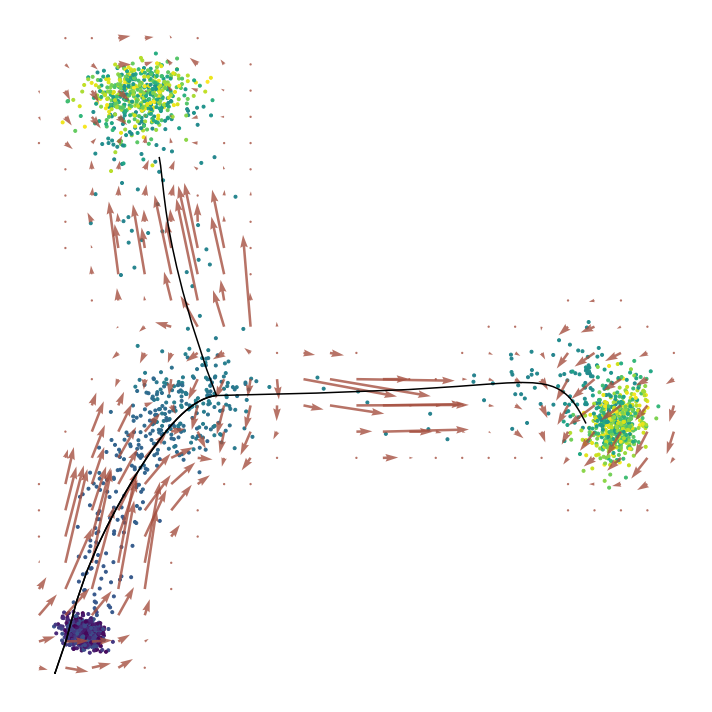

In [219]:
nCells,nGenes,T,tau,topo =  2000,50,30,[0,5,13],"ab(c/d)"
meta = nCells,nGenes,T,tau,topo
import time
t1 = time.time()

from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
rs = RandomState(MT19937(SeedSequence(2812)))

import warnings
warnings.filterwarnings("ignore")


szfig = [1,1]
N = np.prod(szfig)
fig1,ax1 = plt.subplots(szfig[0],szfig[1],figsize=[10,10])
for i_ in range(N):
    axl = np.unravel_index(i_,szfig)

    simdata = simulate_occup_meas(nCells,nGenes,T,tau,topo)
    sim_export(simdata)
    vlm = vcy.VelocytoLoom(loom_filepath="simdata.loom")
    preprocess(vlm,filter=False)
    
    gridArrowPlots(vlm,Trans=["sqrt"],embed="PCA",sim=True,meta=meta,ax=ax1,legend=False)
    ax1.axis('off')
    # ax1[axl].axis('off')


fig1.tight_layout()
dtime = time.time()-t1
print('Runtime: {:.1f} seconds.'.format(dtime))
# fig1.savefig('../figure/bigcompare.png',dpi=450)

In [ ]:
fig1.savefig('./bigcompare.png',dpi=450)

In [ ]:
np.sum(vlm.S.mean(axis=1)>100)

27

In [ ]:
np.sum(vlm.U.mean(axis=1)>100)

18

In [221]:
corr = np.corrcoef(vlm.S)

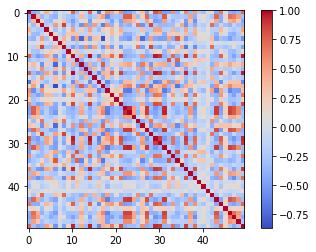

In [222]:
plt.imshow(corr,cmap='coolwarm',interpolation='nearest')
plt.colorbar()

this looks a little weird

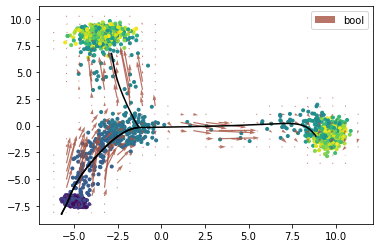

In [223]:
gridArrowPlots(vlm,Trans=["bool"],embed="PCA",sim=True,meta = meta)

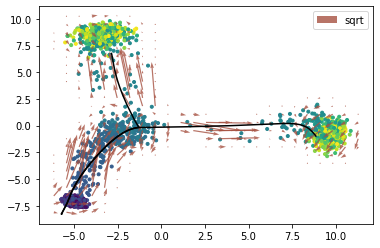

In [224]:
gridArrowPlots(vlm,Trans=["sqrt"],embed="PCA",sim=True,meta = meta)

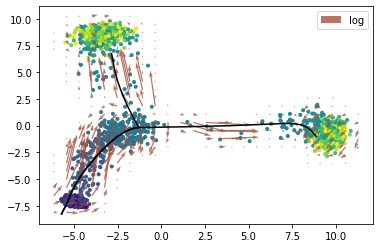

In [225]:
gridArrowPlots(vlm,Trans=["log"],embed="PCA",sim=True,meta = meta)

In [ ]:
# vlm.ra['gamma']

array([1.79502797e+00, 4.40066011e-02, 1.81760295e+00, 7.16745653e-01,
       1.96777051e+01, 2.28120263e+00, 5.05928920e-02, 1.31748558e+01,
       5.53571443e+02, 8.27991873e-01, 1.92551792e-01, 2.91187023e+00,
       5.47181569e-01, 2.55842293e+01, 1.11245883e+00, 1.14053548e+02,
       1.21661789e-01, 9.65383439e+00, 3.42274547e-01, 2.80785975e-01,
       5.22330974e+00, 4.90498413e-02, 1.72071724e+01, 1.05898674e+00,
       9.13267576e-01, 4.00405908e-02, 4.15315102e+00, 1.30426358e+03,
       5.20268186e-01, 6.57759082e-02, 1.08539015e+00, 1.10309756e+00,
       1.90436145e-01, 2.46168728e+00, 2.48705097e+02, 5.14404672e+00,
       4.02088777e+00, 3.30051949e+00, 1.56143948e+01, 1.87285420e-01,
       2.50157131e-01, 4.15425501e-01, 1.43953953e+00, 4.86288561e-01,
       2.51754396e-02, 2.42080562e-01, 2.16087036e-02, 1.35645641e-01,
       1.77568016e-01, 2.82024538e+00, 1.00738252e+01, 2.97312686e-02,
       1.30102749e-02, 1.39122046e+01, 1.82443963e+01, 8.57244236e-01,
      

In [ ]:
getImputed(vlm, knn_k=50)
#makeEmbeds(vlm, embeds=embed, x_name='Sx_sz')
vlm.estimate_transition_prob(hidim="Sx_sz", embed="pcs", transform="bool", n_neighbors=150, knn_random=False, sampled_fraction=1)

In [ ]:
np.shape(vlm.corrcoef_random[np.isnan(vlm.corrcoef_random)])
#vlm.corrcoef_random
#vlm.corrcoef[np.isnan(vlm.corrcoef)]=1


(0,)

In [ ]:
np.sum(vlm.corrcoef_random==-1)

0